In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("./singleTH_csv")

In [2]:
dfs = []
dfs_new = []
csvs = []
titles = ['1_mm_0f', '5_mm_0f', '10_mm_0f', '20_mm_0f', '50_mm_0f', '100_mm_0f', '150_mm_0f', '1_mm_1f', '5_mm_1f', '10_mm_1f', '20_mm_1f', '50_mm_1f', '100_mm_1f', '150_mm_1f', '150_mm_2f', '100_mm_2f', '50_mm_2f', '20_mm_2f', '10_mm_2f', '5_mm_2f', '1_mm_2f']
csvs_new = ['1mm_0f.csv', '5mm_0f.csv', '10mm_0f.csv', '20mm_0f.csv', '50mm_0f.csv', '100mm_0f.csv', '150mm_0f.csv', '1mm_1f.csv', '5mm_1f.csv', '10mm_1f.csv', '20mm_1f.csv', '50mm_1f.csv', '100mm_1f.csv', '150mm_1f.csv', '150mm_2f.csv', '100mm_2f.csv', '50mm_2f.csv', '20mm_2f.csv', '10mm_2f.csv', '5mm_2f.csv', '1mm_2f.csv']
for _ in range(len(csvs_new)):
	dfs_new.append(pd.DataFrame())
dfs = []

for i in range(len(dfs_new)):
	dfs_new[i] = pd.read_csv(csvs_new[i])

In [3]:
brier_scores = []
ECE = []
KL = []
AUC = []
thresholds = [1,5,10,20,50,100,150]

for i in range(len(csvs_new)):
    brier_scores.append(pd.DataFrame(columns=["mm", "brierScore"]))
    ECE.append(pd.DataFrame(columns=["mm", "ECE"]))
    KL.append(pd.DataFrame(columns=["mm", "KL"]))
    AUC.append(pd.DataFrame(columns=["mm", "AUC"]))
    for th in thresholds:
        for d in dfs_new[i][f"test_metric/brierScore {th}"].to_list():
            brier_scores[i+len(csvs)] = pd.concat([brier_scores[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
        for d in dfs_new[i][f"test_metric/ECE {th}"].to_list():
            ECE[i+len(csvs)] = pd.concat([ECE[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
        for d in dfs_new[i][f"test_metric/KL {th}"].to_list():
            KL[i+len(csvs)] = pd.concat([KL[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "KL"])], ignore_index=True)
        for d in dfs_new[i][f"test_metric/AUC {th}"].to_list():
            AUC[i] = pd.concat([AUC[i], pd.DataFrame([[th, d]], columns=["mm", "AUC"])], ignore_index=True)

/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_95474/2936748131.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  brier_scores[i+len(csvs)] = pd.concat([brier_scores[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_95474/2936748131.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ECE[i+len(csvs)] = pd.concat([ECE[i+len(csvs)], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], igno

In [4]:
df_mm = pd.DataFrame(columns=["mm", "AUC", "ECE", "KL", "brierScore", "fineTune"])
for i in range(len(dfs_new)):
    row = {
        "mm" : titles[i].split("_")[0],
        "AUC" : np.mean(AUC[i]["AUC"]),
        "ECE" : np.mean(ECE[i]["ECE"]),
        "KL" : np.mean(KL[i]["KL"]),
        "brierScore" : np.mean(brier_scores[i]["brierScore"]),
        "fineTune" : titles[i].split("_")[2]
            }
    df_mm.loc[len(df_mm.index)] = row
    

1_mm_0f: 0.1204747027821011

5_mm_0f: 0.13411857187747955

10_mm_0f: 0.10245493716663781

20_mm_0f: 0.04316286183893676

50_mm_0f: 0.010282968533121835

100_mm_0f: 0.003380621297158789

150_mm_0f: 0.0007722422448899589

1_mm_1f: 0.12101585417985913

5_mm_1f: 0.13406846341159603

10_mm_1f: 0.10509265959262847

20_mm_1f: 0.043643495067954015

50_mm_1f: 0.01055516897597241

100_mm_1f: 0.003044360559417489

150_mm_1f: 0.0007722225887442112

150_mm_2f: 0.0008793800543571222

100_mm_2f: 0.0029769599944604666

50_mm_2f: 0.01026243462951642

20_mm_2f: 0.04363244088987504

10_mm_2f: 0.09968011743492546

5_mm_2f: 0.13623069806231392

1_mm_2f: 0.11935605605443314



Text(0.5, 1.0, 'BRIER SCORE')

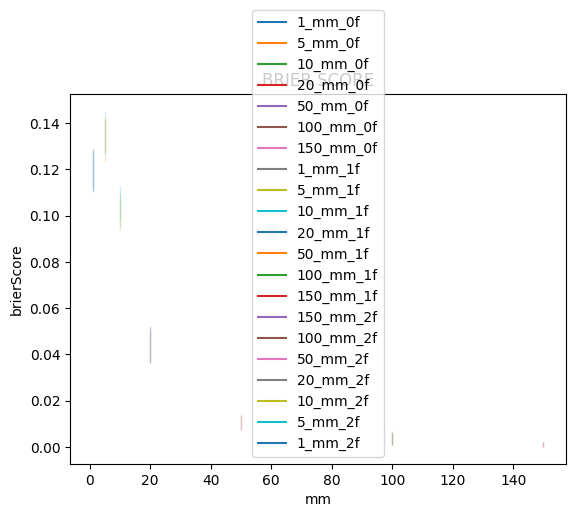

In [5]:
for i in range(len(dfs_new)):
	sns.lineplot(data=brier_scores[i], x="mm", y="brierScore", label=titles[i])
	print(f"{titles[i]}: {np.mean(brier_scores[i]["brierScore"])}\n")
plt.legend()
plt.title("BRIER SCORE")

1_mm_0f: 0.04306212771740872

5_mm_0f: 0.04389534644072526

10_mm_0f: 0.04364963673699868

20_mm_0f: 0.019554778981813455

50_mm_0f: 0.004425481837144689

100_mm_0f: 0.002778272204237845

150_mm_0f: 0.0006794902835598112

1_mm_1f: 0.04126834498042166

5_mm_1f: 0.0421464959581664

10_mm_1f: 0.050125446376190985

20_mm_1f: 0.017345606047610387

50_mm_1f: 0.006795056548099578

100_mm_1f: 0.002217542208781522

150_mm_1f: 0.0007689755298111111

150_mm_2f: 0.0013070875082382778

100_mm_2f: 0.0020889140853417223

50_mm_2f: 0.005369760067954045

20_mm_2f: 0.01931501571416632

10_mm_2f: 0.03431992027377679

5_mm_2f: 0.046891201496039994

1_mm_2f: 0.03490443606327446



Text(0.5, 1.0, 'ECE')

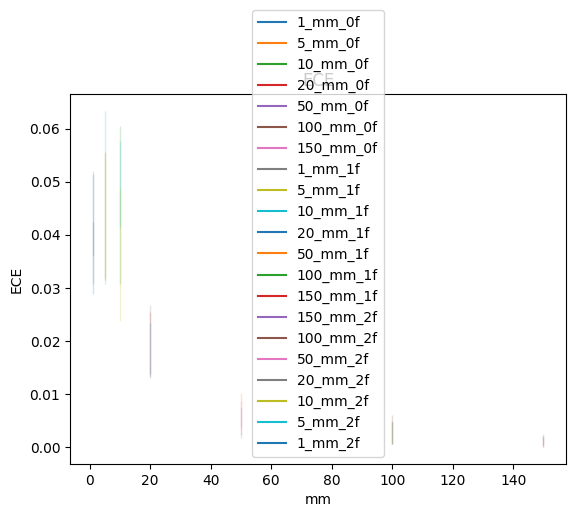

In [6]:
for i in range(len(dfs_new)):
	sns.lineplot(data=ECE[i], x="mm", y="ECE", label=titles[i])
	print(f"{titles[i]}: {np.mean(ECE[i]['ECE'])}\n")
plt.legend()
plt.title("ECE")

1_mm_0f: 5.310462050967747

5_mm_0f: 5.420537577735053

10_mm_0f: 4.001068009270562

20_mm_0f: 1.6630441347757976

50_mm_0f: 0.3595345815022786

100_mm_0f: 0.0897602553789814

150_mm_0f: 0.017844867177902565

1_mm_1f: 5.343682342105442

5_mm_1f: 5.419120576646593

10_mm_1f: 3.843583345413208

20_mm_1f: 1.7123519712024264

50_mm_1f: 0.4096900059117211

100_mm_1f: 0.09256977058895341

150_mm_1f: 0.017781393317919624

150_mm_2f: 0.029543946600622546

100_mm_2f: 0.09658795781433578

50_mm_2f: 0.4188317590289646

20_mm_2f: 1.6778220865461562

10_mm_2f: 4.066206720140245

5_mm_2f: 5.391522354549831

1_mm_2f: 5.181478129492866



Text(0.5, 1.0, 'KL')

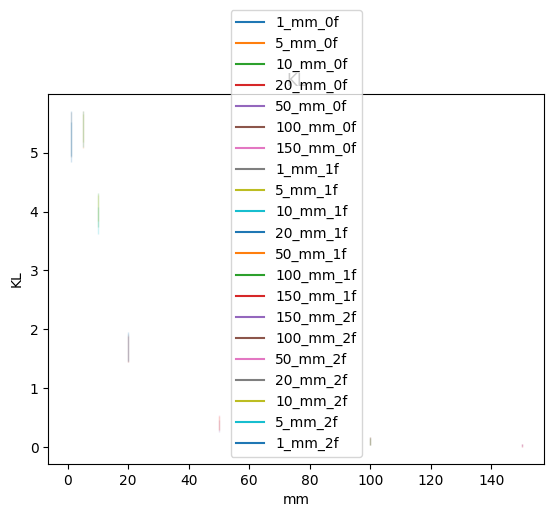

In [7]:
for i in range(len(dfs_new)):
	sns.lineplot(data=KL[i], x="mm", y="KL", label=titles[i])
	print(f"{titles[i]}: {np.mean(KL[i]['KL'])}\n")
plt.legend()
plt.title("KL")

1_mm_0f: 0.8894427872749885

5_mm_0f: 0.8871729322059069

10_mm_0f: 0.8984695764252986

20_mm_0f: 0.9417237678688591

50_mm_0f: 0.9850658358212312

100_mm_0f: 0.8188558601075151

150_mm_0f: 0.6947446126190615

1_mm_1f: 0.8879589850032836

5_mm_1f: 0.8883982014347336

10_mm_1f: 0.8914060300779094

20_mm_1f: 0.935167841888632

50_mm_1f: 0.982778397769073

100_mm_1f: 0.9792717418280004

150_mm_1f: 0.7537265251427561

150_mm_2f: 0.8211071427408363

100_mm_2f: 0.9826309781634804

50_mm_2f: 0.9862231337437807

20_mm_2f: 0.9356159113511033

10_mm_2f: 0.8997967545806499

5_mm_2f: 0.8852885334176065

1_mm_2f: 0.8896987619993388



Text(0.5, 1.0, 'AUC')

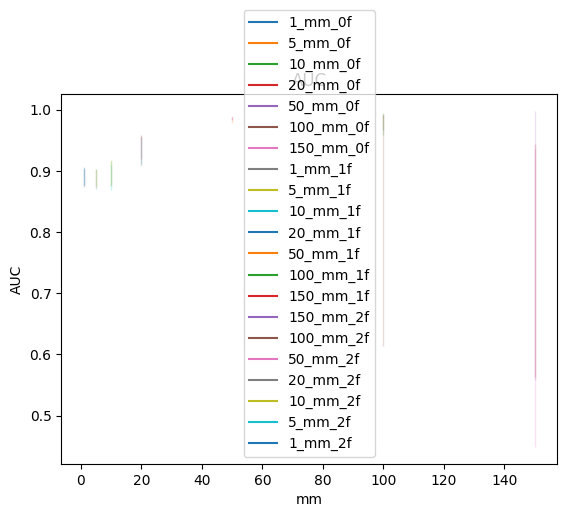

In [8]:
for i in range(len(csvs_new)):
	sns.lineplot(data=AUC[i], x="mm", y="AUC", label=titles[i+len(csvs)])
	print(f"{titles[i+len(csvs)]}: {np.mean(AUC[i]['AUC'])}\n")
plt.legend()
plt.title("AUC")

fineTune alternate: 0.05974174633945311

no fineTune: 0.05923527224861797

sum fineTune: 0.05900258387426879



Text(0.5, 1.0, 'brierScore')

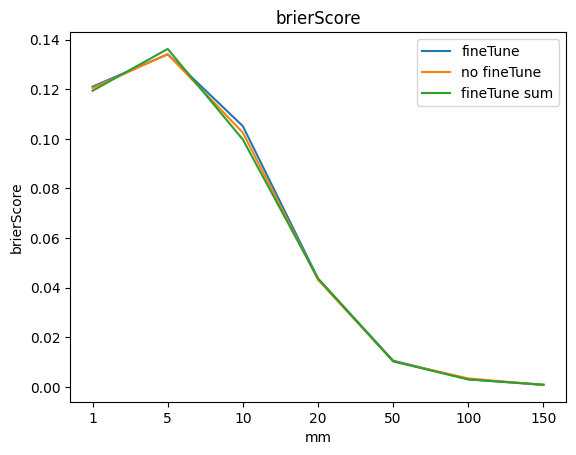

In [9]:
sns.lineplot(data=df_mm[df_mm["fineTune"] == "1f"], x="mm", y="brierScore", label="fineTune")
sns.lineplot(data=df_mm[df_mm["fineTune"] == "0f"], x="mm", y="brierScore", label="no fineTune")
sns.lineplot(data=df_mm[df_mm["fineTune"] == "2f"], x="mm", y="brierScore", label="fineTune sum")

print(f"fineTune alternate: {np.mean(df_mm[df_mm["fineTune"] == "1f"]["brierScore"])}\n")
print(f"no fineTune: {np.mean(df_mm[df_mm["fineTune"] == "0f"]["brierScore"])}\n")
print(f"sum fineTune: {np.mean(df_mm[df_mm["fineTune"] == "2f"]["brierScore"])}\n")

plt.legend()
plt.title("brierScore")

fineTune alternate: 0.022952495378440237

no fineTune: 0.022577876314555496

sum fineTune: 0.0205994764583988



Text(0.5, 1.0, 'ECE')

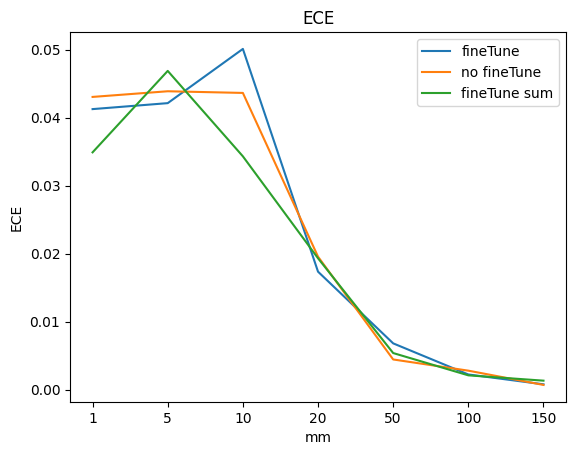

In [10]:
sns.lineplot(data=df_mm[df_mm["fineTune"] == "1f"], x="mm", y="ECE", label="fineTune")
sns.lineplot(data=df_mm[df_mm["fineTune"] == "0f"], x="mm", y="ECE", label="no fineTune")
sns.lineplot(data=df_mm[df_mm["fineTune"] == "2f"], x="mm", y="ECE", label="fineTune sum")

print(f"fineTune alternate: {np.mean(df_mm[df_mm["fineTune"] == "1f"]["ECE"])}\n")
print(f"no fineTune: {np.mean(df_mm[df_mm["fineTune"] == "0f"]["ECE"])}\n")
print(f"sum fineTune: {np.mean(df_mm[df_mm["fineTune"] == "2f"]["ECE"])}\n")

plt.legend()
plt.title("ECE")

fineTune alternate: 2.4055399150266084

no fineTune: 2.4088930681154745

fineTune sum: 2.408856136310432



Text(0.5, 1.0, 'KL')

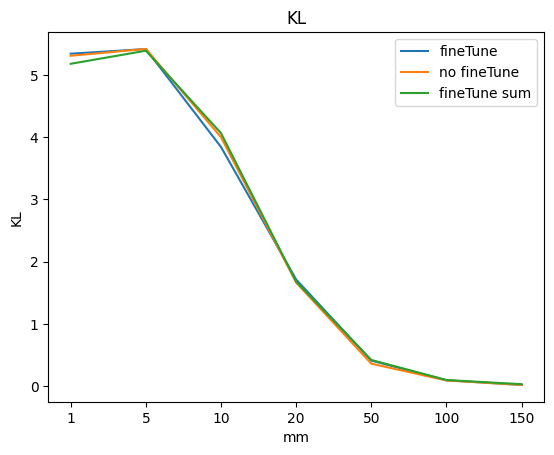

In [11]:
sns.lineplot(data=df_mm[df_mm["fineTune"] == "1f"], x="mm", y="KL", label="fineTune")
sns.lineplot(data=df_mm[df_mm["fineTune"] == "0f"], x="mm", y="KL", label="no fineTune")
sns.lineplot(data=df_mm[df_mm["fineTune"] == "2f"], x="mm", y="KL", label="fineTune sum")

print(f"fineTune alternate: {np.mean(df_mm[df_mm["fineTune"] == "1f"]["KL"])}\n")
print(f"no fineTune: {np.mean(df_mm[df_mm["fineTune"] == "0f"]["KL"])}\n")
print(f"fineTune sum: {np.mean(df_mm[df_mm["fineTune"] == "2f"]["KL"])}\n")

plt.legend()
plt.title("KL")